In [6]:
import pylab as pl
import pymc as mc
import pandas as pd
%matplotlib inline

In [38]:
N = 100

X = pd.DataFrame({'constant':pl.ones(N),'cov_1':pl.randn(N)})
beta_true = pd.Series(dict(constant=100.,cov_1=20.))
mu_true = pl.dot(X,beta_true)
Y = mc.rpoisson(mu_true)

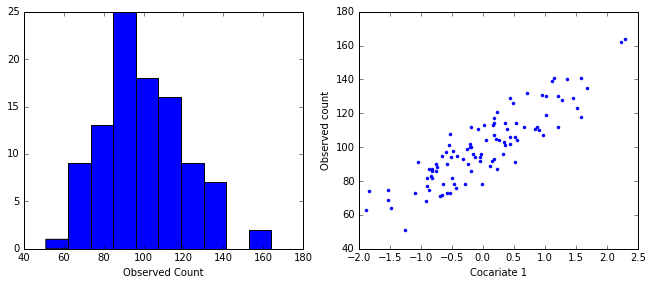

In [39]:
pl.figure(figsize=(11,4.25))

pl.subplot(1,2,1)
pl.hist(Y)
pl.xlabel('Observed Count')

pl.subplot(1,2,2)
pl.plot(X['cov_1'],Y,'.')
pl.xlabel('Cocariate 1')
pl.ylabel('Observed count')

In [44]:
print 'pymc version:',mc.__version__

beta = mc.Uninformative('beta',value=[Y.mean(),0.])

#@mc.deterministic(plot=False)
#def mu_pred(beta=beta,X=X):
#    return pl.dot(X,beta)
mu_pred = mc.Lambda('mu_pred',lambda beta=beta,X=X: pl.dot(X,beta))
Y_obs = mc.Poisson('Y_obs',mu=mu_pred,value=Y,observed=True)

pymc version: 2.3.6


In [45]:
m = mc.Model([beta,mu_pred,Y_obs])
%time mc.MCMC(m).sample(10000,5000,5,progress_bar=False)

CPU times: user 1.92 s, sys: 3.32 ms, total: 1.92 s
Wall time: 1.96 s


Plotting beta_0
Plotting beta_1


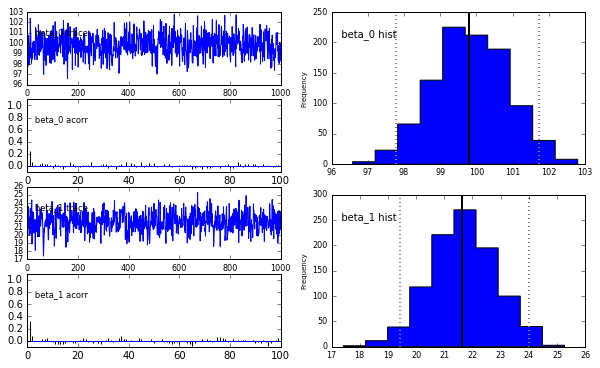

In [46]:
mc.Matplot.plot(beta,common_scale=False)

In [47]:
beta.stats()

{'95% HPD interval': array([[  97.77564526,   19.43371952],
        [ 101.73248274,   24.00948879]]),
 'mc error': array([ 0.04220408,  0.05237023]),
 'mean': array([ 99.81905846,  21.64436857]),
 'n': 1000,
 'quantiles': {2.5: array([ 97.80147661,  19.22462325]),
  25: array([ 99.11016828,  20.84792889]),
  50: array([ 99.79877703,  21.62297452]),
  75: array([ 100.5378162 ,   22.42869794]),
  97.5: array([ 101.82488381,   23.90387158])},
 'standard deviation': array([ 1.01831264,  1.17012318])}

array([ 104.35270486,   91.34397684,  101.84925188,  105.47413202,
        107.37187965,   86.8477184 ,   88.23189002,  104.37402215,
        149.09384505,   86.67408512,  109.95993319,   81.46046774,
        100.27796337,   98.08713929,  109.02103537,  104.36746599,
        127.6001662 ,  108.32109575,  111.70410622,  122.36036955,
         69.33610896,  121.10268016,  100.05070199,   98.78537448,
         78.44521977,   90.10828814,  129.29663453,   83.19599091,
         83.31183672,   90.6979464 ,   82.07709945,  112.32036461,
        136.40289548,   84.46892141,   68.26971227,  104.39881505,
        134.05342916,   89.21261596,  126.49048944,   85.07490979,
        109.94817124,   99.807848  ,   81.59675709,  119.0939552 ,
        134.24345125,   88.31194256,   93.76967986,   86.73840438,
        106.14170718,   88.11412223,   84.68552354,   81.14171256,
         73.94094836,  124.24758652,   96.63934122,  115.55546326,
        132.7855638 ,   95.41929617,   96.5753286 ,   85.78880